<a href="https://colab.research.google.com/github/Soniartha/My_Strategy_Trading_Soniartha/blob/main/Chapter_7_Resampling_and_Interpolation_Simulation_on_GBPUSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#import library
from pandas import read_csv
from matplotlib import pyplot

In [28]:
series = read_csv('/content/GBPUSD_Daily_202001020000_202012310000.csv', header = 0, index_col=0, squeeze= True, parse_dates= True)
df = series.filter(['<CLOSE>'])
df

,<CLOSE>
<DATE>,
2020-01-02,1.31363
2020-01-03,1.30743
2020-01-06,1.31682
2020-01-07,1.31203
2020-01-08,1.30938
...,...
2020-12-24,1.35336
2020-12-28,1.34511
2020-12-29,1.35003


In [ ]:
upsampled = df.resample('H').mean()
print (upsampled.head(32))

                      <CLOSE>
<DATE>                       
2020-01-02 00:00:00  1.313630
2020-01-02 01:00:00  1.313372
2020-01-02 02:00:00  1.313113
2020-01-02 03:00:00  1.312855
2020-01-02 04:00:00  1.312597
2020-01-02 05:00:00  1.312338
2020-01-02 06:00:00  1.312080
2020-01-02 07:00:00  1.311822
2020-01-02 08:00:00  1.311563
2020-01-02 09:00:00  1.311305
2020-01-02 10:00:00  1.311047
2020-01-02 11:00:00  1.310788
2020-01-02 12:00:00  1.310530
2020-01-02 13:00:00  1.310272
2020-01-02 14:00:00  1.310013
2020-01-02 15:00:00  1.309755
2020-01-02 16:00:00  1.309497
2020-01-02 17:00:00  1.309238
2020-01-02 18:00:00  1.308980
2020-01-02 19:00:00  1.308722
2020-01-02 20:00:00  1.308463
2020-01-02 21:00:00  1.308205
2020-01-02 22:00:00  1.307947
2020-01-02 23:00:00  1.307688
2020-01-03 00:00:00  1.307430
2020-01-03 01:00:00  1.307560
2020-01-03 02:00:00  1.307691
2020-01-03 03:00:00  1.307821
2020-01-03 04:00:00  1.307952
2020-01-03 05:00:00  1.308082
2020-01-03 06:00:00  1.308212
2020-01-03

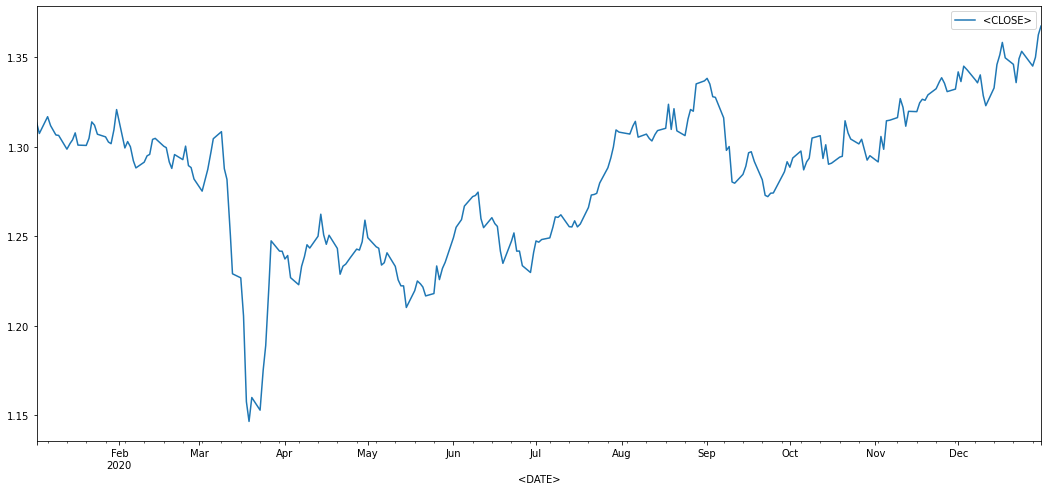

In [13]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot(figsize = (18,8))
pyplot.show()

                      <CLOSE>
<DATE>                       
2020-01-02 00:00:00  1.313630
2020-01-02 01:00:00  1.313372
2020-01-02 02:00:00  1.313113
2020-01-02 03:00:00  1.312855
2020-01-02 04:00:00  1.312597
2020-01-02 05:00:00  1.312338
2020-01-02 06:00:00  1.312080
2020-01-02 07:00:00  1.311822
2020-01-02 08:00:00  1.311563
2020-01-02 09:00:00  1.311305
2020-01-02 10:00:00  1.311047
2020-01-02 11:00:00  1.310788
2020-01-02 12:00:00  1.310530
2020-01-02 13:00:00  1.310272
2020-01-02 14:00:00  1.310013
2020-01-02 15:00:00  1.309755
2020-01-02 16:00:00  1.309497
2020-01-02 17:00:00  1.309238
2020-01-02 18:00:00  1.308980
2020-01-02 19:00:00  1.308722
2020-01-02 20:00:00  1.308463
2020-01-02 21:00:00  1.308205
2020-01-02 22:00:00  1.307947
2020-01-02 23:00:00  1.307688
2020-01-03 00:00:00  1.307430
2020-01-03 01:00:00  1.307560
2020-01-03 02:00:00  1.307691
2020-01-03 03:00:00  1.307821
2020-01-03 04:00:00  1.307952
2020-01-03 05:00:00  1.308082
2020-01-03 06:00:00  1.308212
2020-01-03

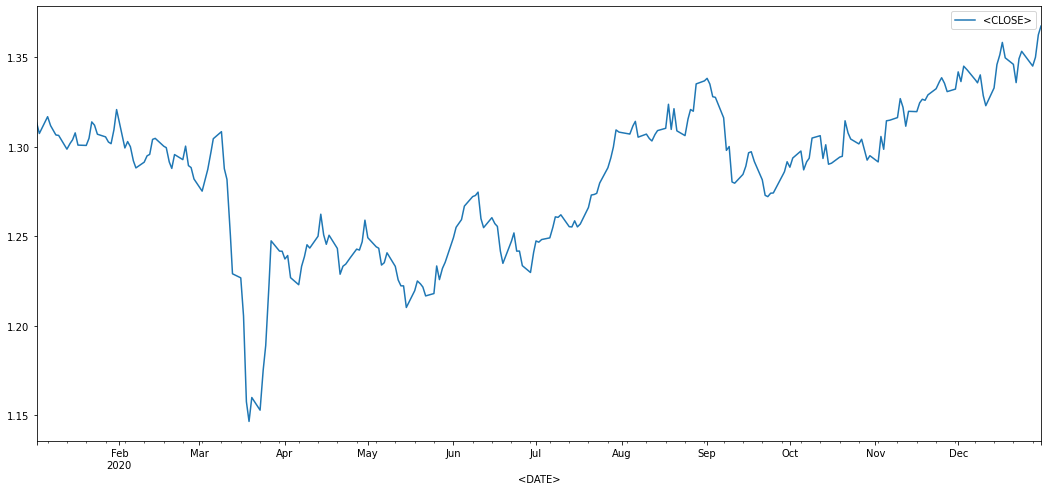

In [18]:
interpolated1 = upsampled.interpolate(method='linear')
print(interpolated1.head(32))
interpolated1.plot(figsize = (18,8))
pyplot.show()

##Downsampling

             <CLOSE>
<DATE>              
2020-01-31  1.307423
2020-02-29  1.295125
2020-03-31  1.234750
2020-04-30  1.241488
2020-05-31  1.229081


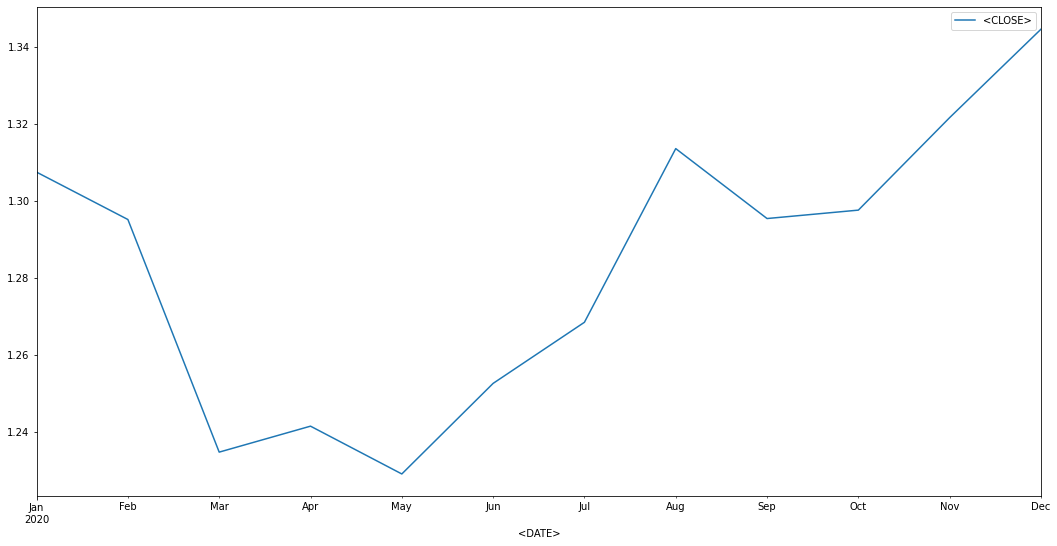

In [20]:
resample = df.resample('M')
monthly_mean_price = resample.mean()
print(monthly_mean_price.head())
monthly_mean_price.plot(figsize= (18,9))
pyplot.show()

In [30]:
##Percobaan menginterpolasi data yang terdapat NaN
## Biasanya Forex data memiliki data miss pada hari weekend (sabtu dan minggu)
## Pada beberapa algoritme, tidak dapat dilakukan karena harus memiliki datetime yang sequence

resample1 = df.resample('D').mean()
interpolated2 = resample1.interpolate(method = 'linear')
print(resample1.head(10))
print(interpolated2.head(10))

            <CLOSE>
<DATE>             
2020-01-02  1.31363
2020-01-03  1.30743
2020-01-04      NaN
2020-01-05      NaN
2020-01-06  1.31682
2020-01-07  1.31203
2020-01-08  1.30938
2020-01-09  1.30659
2020-01-10  1.30637
2020-01-11      NaN
             <CLOSE>
<DATE>              
2020-01-02  1.313630
2020-01-03  1.307430
2020-01-04  1.310560
2020-01-05  1.313690
2020-01-06  1.316820
2020-01-07  1.312030
2020-01-08  1.309380
2020-01-09  1.306590
2020-01-10  1.306370
2020-01-11  1.303803
